In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('DS-Take-Home-Sample-Data - DS-Take-Home-Sample-Data.csv')
data.head()

,source,campaign,region,locality,preferred_doctor_gender,dental_anxiety,last_visited_a_dentist,how_soon_they_want_to_book,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested,appointment_status,appointment_scheduled,appointment_billed,chosen_provider_insurance_status,chosen_provider_distance
0,facebook,san_diego_dentist_patient_acquisition,San Jose,San Jose,No Pref,A little nervous,< 1 year,ASAP,Specific Treatment,f,9,0,0,10547.219510,f,NaN,f,NaN,NaN,NaN
1,facebook,san_diego_dentist_patient_acquisition,San Diego,Chula Vista,F,Not at all nervous,2+ years,2 weeks,Checkup & Cleaning,f,2,0,0,20784.617720,f,NaN,f,NaN,NaN,NaN
2,try.opencare.com,Unknown,Austin,Austin,No Pref,Moderately nervous,2+ years,ASAP,Checkup & Cleaning,t,9,8,1,8014.945931,t,CANCELLED,f,f,in-network,2855.594821
3,facebook,denver_dentist_patient_acquisition,Denver,Golden,No Pref,Not at all nervous,< 1 year,ASAP,Specific Treatment,t,8,2,6,16651.158750,f,NaN,f,NaN,NaN,NaN
4,facebook,chicago_dentist_patient_acquisition,Chicago,Chicago,F,Not at all nervous,< 1 year,1 week,Checkup & Cleaning,f,9,0,0,5216.934559,f,NaN,f,NaN,NaN,NaN


In [13]:
status = data[data.appointment_requested == 't']

In [14]:
apt_com = status[status.appointment_status == 'COMPLETED']

In [15]:
len(apt_com)/len(status)

0.5235188509874327

In [16]:
billed = apt_com[apt_com.appointment_billed == 't']

In [17]:
len(billed)/ len(apt_com)

0.7976680384087792

In [23]:
success = data[(data.appointment_requested == 't') & (data.appointment_status == 'COMPLETED') & (data.appointment_billed == 't')]

In [25]:
len(success)/len(data)

0.09746082292801475

In [ ]:
#### What region has most appt requests & successful appts?

In [26]:
success = []
for i in range(len(data)):
    if (data['appointment_requested'][i] == 't') & (data['appointment_status'][i] == 'COMPLETED') & (data['appointment_billed'][i] == 't'):
        success.append(1)
    else:
        success.append(0)

In [27]:
data['success'] = success

In [28]:
appt_booked = []
for i in range(len(data)):
    if (data['appointment_requested'][i] == 't'):
        appt_booked.append(1)
    else:
        appt_booked.append(0)

In [29]:
data['appt_booked'] = appt_booked

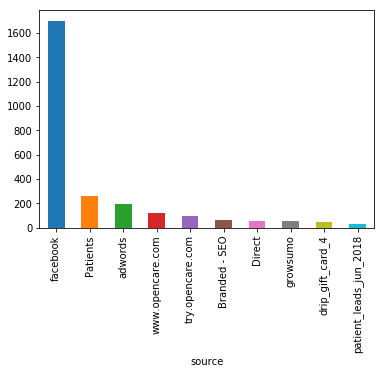

In [41]:
data.groupby(['source'])['appt_booked'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

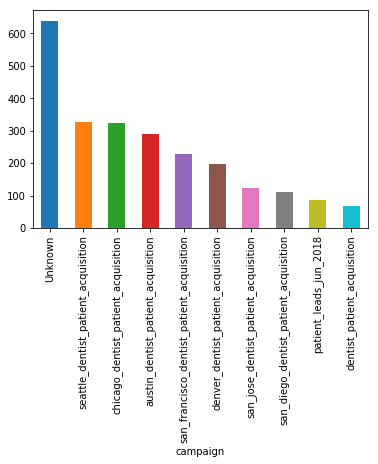

In [76]:
data.groupby(['campaign'])['appt_booked'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

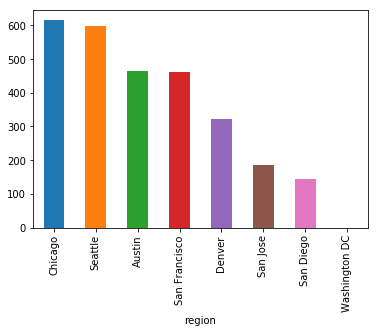

In [45]:
data.groupby(['region'])['appt_booked'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

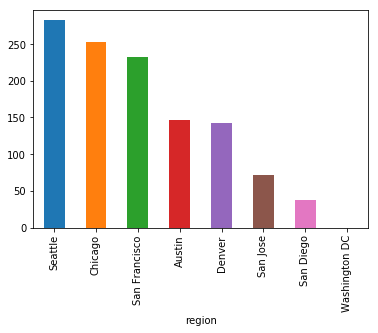

In [46]:
data.groupby(['region'])['success'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

In [50]:
data['total'] = 1

In [52]:
region_source = data.groupby(['region', 'source'])['total','appt_booked'].sum().reset_index()

In [54]:
region_source['percent_converted'] = region_source.appt_booked/region_source.total *100

In [67]:
source = region_source.groupby(['source'])['total','appt_booked'].sum().sort_values(by = 'appt_booked',ascending = False).reset_index()

In [69]:
source['conversion_percentage'] = source.appt_booked/source.total *100

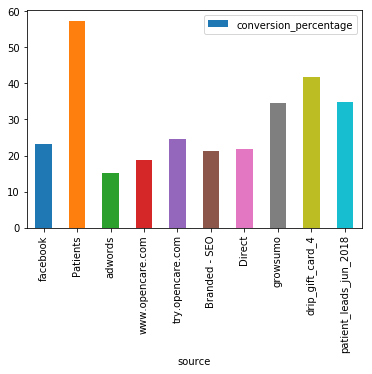

In [74]:
source.head(10).plot(kind = 'bar', y = 'conversion_percentage', x = 'source')